In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df_crop = pd.read_csv("Crop_recommendation.csv")

In [3]:
# Display basic information about the dataset
print(df_crop.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [4]:
# Display the first few rows of the dataset to understand its structure
df_crop.head()


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Check for missing values in the dataset
print(df_crop.isna().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [6]:
df_crop.N.value_counts()

N
22     44
40     44
27     42
39     41
31     41
       ..
136     2
139     1
135     1
130     1
46      1
Name: count, Length: 137, dtype: int64

In [7]:
df_crop.P.value_counts()

P
60    56
58    48
56    46
55    44
57    42
      ..
83     2
82     2
90     2
93     1
84     1
Name: count, Length: 117, dtype: int64

In [8]:
df_crop.K.value_counts()

K
17    90
22    87
15    86
20    80
25    78
      ..
5      8
11     8
13     7
7      5
80     4
Name: count, Length: 73, dtype: int64

In [9]:
df_crop.temperature.value_counts()

temperature
20.879744    1
29.480699    1
29.943492    1
28.033065    1
29.884305    1
            ..
25.365861    1
28.568406    1
30.284966    1
27.325421    1
23.603016    1
Name: count, Length: 2200, dtype: int64

In [10]:
df_crop.humidity.value_counts()

humidity
82.002744    1
90.336987    1
93.907412    1
91.473558    1
94.037115    1
            ..
66.637972    1
61.532786    1
61.692951    1
69.090478    1
60.396475    1
Name: count, Length: 2200, dtype: int64

In [11]:
df_crop.ph.value_counts()

ph
6.502985    1
6.640471    1
6.251420    1
6.274453    1
6.135996    1
           ..
7.538631    1
7.127064    1
6.628265    1
6.726469    1
6.779833    1
Name: count, Length: 2200, dtype: int64

In [12]:
df_crop.rainfall.value_counts()

rainfall
202.935536    1
26.036577     1
20.390205     1
21.179248     1
21.000099     1
             ..
65.816559     1
63.497263     1
65.628595     1
61.192509     1
140.937041    1
Name: count, Length: 2200, dtype: int64

In [13]:
df_crop.label.value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [14]:
df_crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [15]:
# 1. Handle Missing Values
# For categorical columns, fill with mode
for column in ['label']:
    mode_val = df_crop[column].mode()[0]
    df_crop[column].fillna(mode_val, inplace=True)

# For numerical columns, fill with median
for column in ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']:
    median_val = df_crop[column].median()
    df_crop[column].fillna(median_val, inplace=True)

In [16]:
df_crop.duplicated().sum()

0

In [71]:
# Check for duplicates and remove if any
df_crop.drop_duplicates(inplace=True)

In [72]:
# Data Visualization

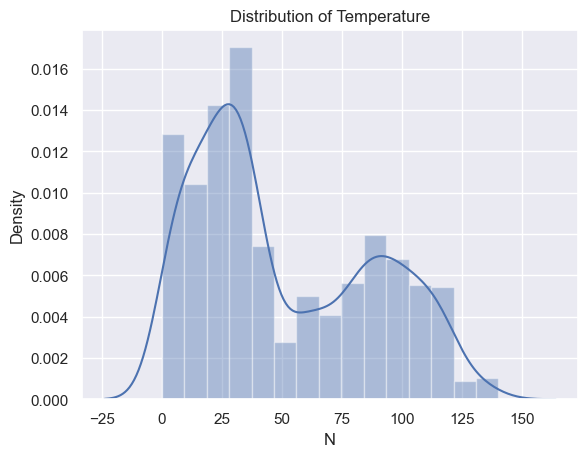

In [73]:

# Distribution plots for numerical features
sns.distplot(df_crop['N'])
plt.title('Distribution of Temperature')
plt.show()

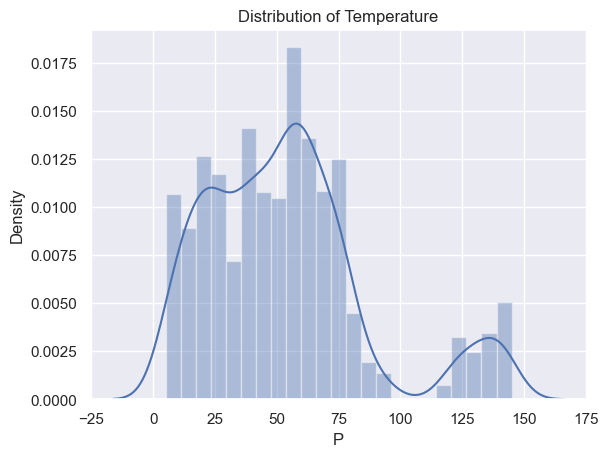

In [74]:
# Distribution plots for numerical features
sns.distplot(df_crop['P'])
plt.title('Distribution of Temperature')
plt.show()

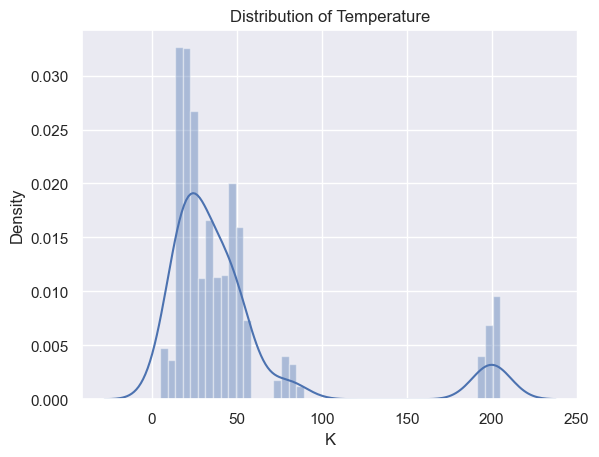

In [75]:
# Distribution plots for numerical features
sns.distplot(df_crop['K'])
plt.title('Distribution of Temperature')
plt.show()

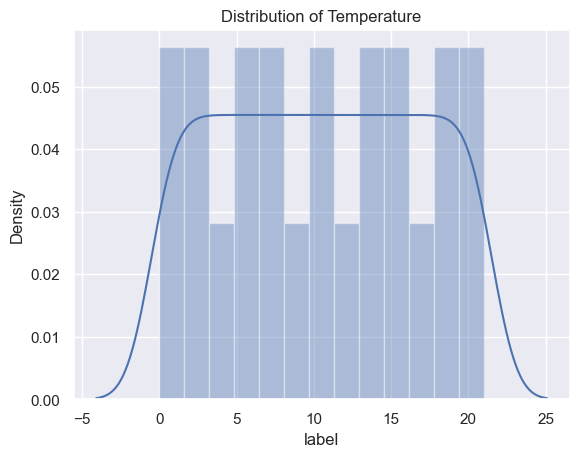

In [76]:

# Distribution plots for numerical features
sns.distplot(df_crop['label'])
plt.title('Distribution of Temperature')
plt.show()

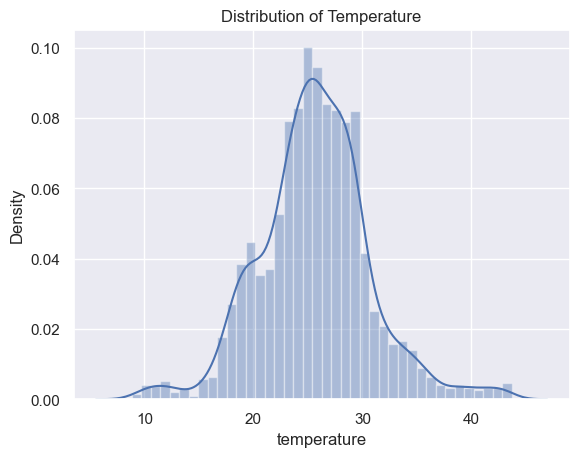

In [77]:

# Distribution plots for numerical features
sns.distplot(df_crop['temperature'])
plt.title('Distribution of Temperature')
plt.show()

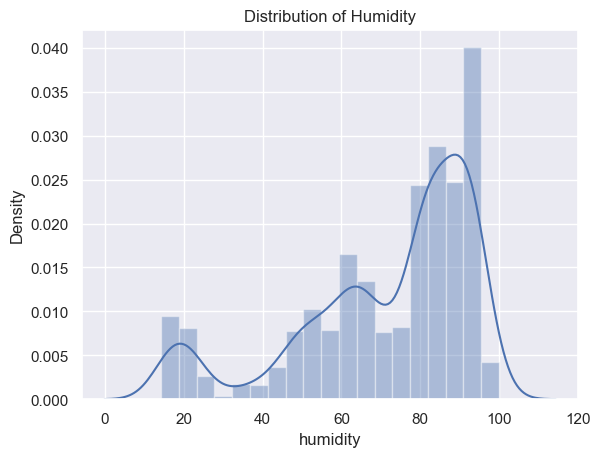

In [78]:
sns.distplot(df_crop['humidity'])
plt.title('Distribution of Humidity')
plt.show()

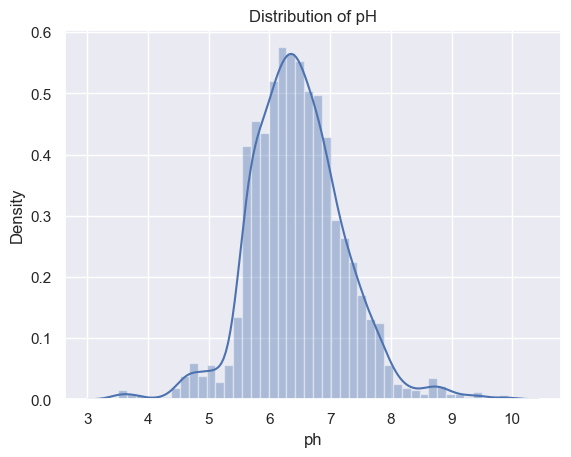

In [79]:
sns.distplot(df_crop['ph'])
plt.title('Distribution of pH')
plt.show()

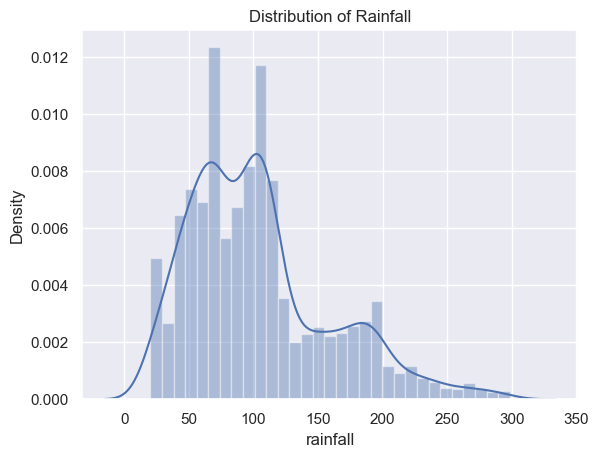

In [80]:
sns.distplot(df_crop['rainfall'])
plt.title('Distribution of Rainfall')
plt.show()


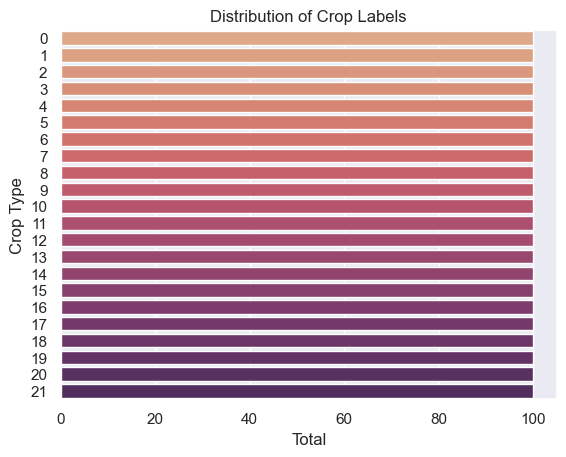

In [81]:
# Count plot for target variable 'label'
sns.set_theme(style="darkgrid")
sns.countplot(y="label", data=df_crop, palette="flare")
plt.title('Distribution of Crop Labels')
plt.ylabel('Crop Type')
plt.xlabel('Total')
plt.show()

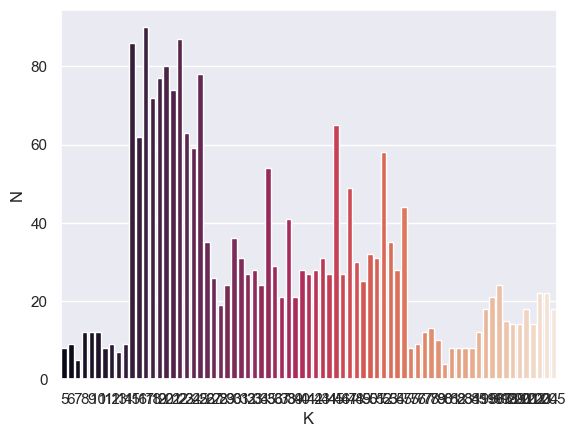

In [82]:
sns.set_theme(style="darkgrid")
sns.countplot(x="K", data=df_crop, palette="rocket")
#plt.xlabel('Gender (F=<60, M=>60)')
plt.ylabel('N')
plt.show()

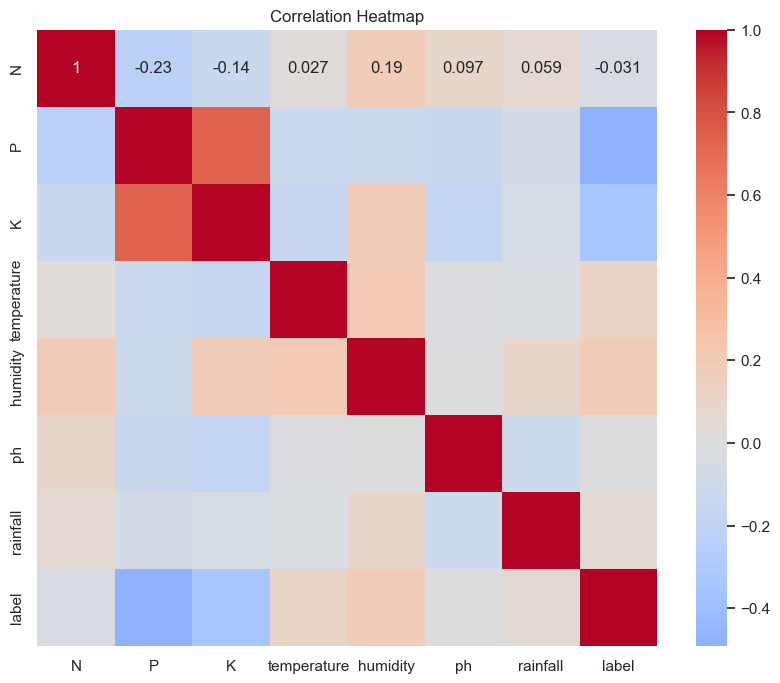

In [83]:
# Correlation matrix
corr_matrix = df_crop.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title('Correlation Heatmap')
plt.show()

In [54]:
# Feature Engineering


In [55]:
# Encoding the target variable 'label'
le = LabelEncoder()
df_crop['label'] = le.fit_transform(df_crop['label'])


In [56]:
# Splitting the data into training and testing sets
X = df_crop.drop(["label"], axis=1)
y = df_crop["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [57]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [58]:
X_train.head()

,N,P,K,temperature,humidity,ph,rainfall
52,93,56,42,23.857240,82.225730,7.382763,195.094831
1354,82,25,51,24.313350,87.474091,6.074210,48.112484
1655,4,6,7,23.010143,91.117642,6.708890,112.673830
360,7,63,24,22.954582,24.035531,5.858618,107.731539
1609,13,23,6,23.961476,90.264080,7.365338,102.695870


In [59]:
X_test.head()

,N,P,K,temperature,humidity,ph,rainfall
1320,105,14,50,26.214884,87.688398,6.419052,59.655908
1367,91,12,46,24.644585,85.499382,6.343943,48.312190
1291,14,121,203,9.724458,83.747656,6.158689,74.464111
264,52,73,79,17.257695,18.749440,7.840339,94.002872
728,32,66,17,34.946616,65.267740,7.162358,70.141514


In [60]:
# Model Training and Evaluation
print("Number of features in X_train:", X_train.shape[1])
print("Number of features in X_test:", X_test.shape[1])

Number of features in X_train: 7
Number of features in X_test: 7


In [61]:
# Logistic Regression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)
y_pred_lr = LRclassifier.predict(X_test)
LRAcc = accuracy_score(y_pred_lr, y_test)
print('Logistic Regression accuracy: {:.2f}%'.format(LRAcc * 100))


Logistic Regression accuracy: 95.00%


In [62]:
# K-Nearest Neighbors
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)
y_pred_knn = KNclassifier.predict(X_test)
KNAcc = accuracy_score(y_pred_knn, y_test)
print('K-Neighbors accuracy: {:.2f}%'.format(KNAcc * 100))

K-Neighbors accuracy: 95.91%


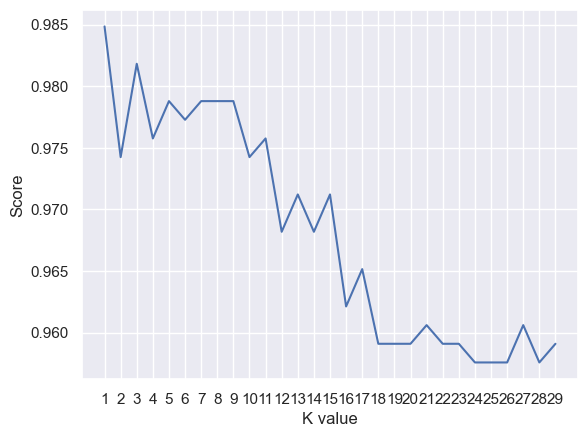

KNN Acc Max 98.48%


In [63]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max {:.2f}%".format(KNAccMax*100))

In [64]:
# SVM
SVCclassifier = SVC(kernel='linear', max_iter=5000)
SVCclassifier.fit(X_train, y_train)
y_pred_svc = SVCclassifier.predict(X_test)
SVCAcc = accuracy_score(y_pred_svc, y_test)
print('SVM accuracy: {:.2f}%'.format(SVCAcc * 100))

SVM accuracy: 98.64%


In [65]:
# Decision Tree
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=5)
DTclassifier.fit(X_train, y_train)
y_pred_dt = DTclassifier.predict(X_test)
DTAcc = accuracy_score(y_pred_dt, y_test)
print('Decision Tree accuracy: {:.2f}%'.format(DTAcc * 100))


Decision Tree accuracy: 20.61%


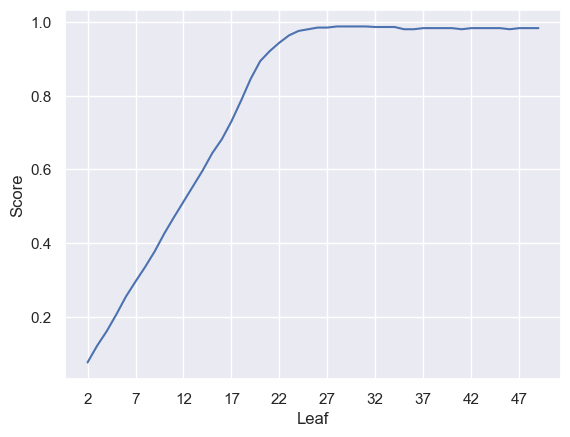

DT Acc Max 98.79%


In [66]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,5))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max {:.2f}%".format(DTAccMax*100))

In [67]:
# Random Forest
RFclassifier = RandomForestClassifier(max_leaf_nodes=5, n_estimators=100, random_state=1)
RFclassifier.fit(X_train, y_train)
y_pred_rf = RFclassifier.predict(X_test)
RFAcc = accuracy_score(y_pred_rf, y_test)
print('Random Forest accuracy: {:.2f}%'.format(RFAcc * 100))

Random Forest accuracy: 81.06%


In [68]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lr)
print(cm)

[[28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0]
 [ 0  0 31  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0 26  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  6  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0]
 [ 0  0  3  0  0  0  0  0  0  0  0  1  0 26  1  0  0  1  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0

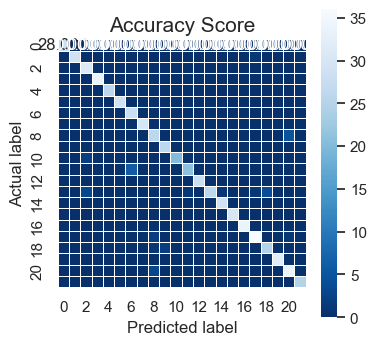

In [69]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score'
plt.title(all_sample_title, size = 15);

In [70]:
# Model Comparison
compare = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Neighbors', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [LRAcc * 100, KNAcc * 100, SVCAcc * 100, DTAcc * 100, RFAcc * 100]
})

compare_sorted = compare.sort_values(by='Accuracy', ascending=False)
print(compare_sorted)

                 Model   Accuracy
2                  SVM  98.636364
1          K-Neighbors  95.909091
0  Logistic Regression  95.000000
4        Random Forest  81.060606
3        Decision Tree  20.606061
